# <center> Assignment 2: HR Analytics - Job Change of Data Scientists </center>

## Data

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

- The dataset is imbalanced.
- Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
- Missing imputation can be a part of your pipeline as well.

Ref: [HR Analytics - Job Change of Data Scientists](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)
**Data Descriptions**:

|Features|Descriptions
|-|-|
|enrollee_id| Unique ID for candidate|
|city| City code|
|city_ development _index| Developement index of the city (scaled)|
|gender| Gender of candidate|
|relevent_experience| Relevant experience of candidate|
|enrolled_university| Type of University course enrolled if any|
|education_level| Education level of candidate|
|major_discipline|Education major discipline of candidate|
|experience| Candidate total experience in years|
|company_size| No of employees in current employer's company|
|company_type| Type of current employer|
|lastnewjob| Difference in years between previous job and current job|
|training_hours| training hours completed|
|target| 0 – Not looking for job change, 1 – Looking for a job change|

**Train test split 80/20 random_state 42,KPI: f1-score - 0.75**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import get_dummies
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 
import warnings
warnings.filterwarnings("ignore")

In [2]:
job = pd.read_csv('train.csv')
job.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
job.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
job.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


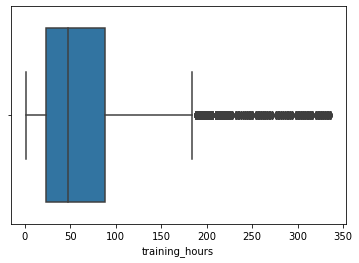

In [6]:
sns.boxplot(data = job,
            x = 'training_hours',
            hue = 'target')
plt.show()

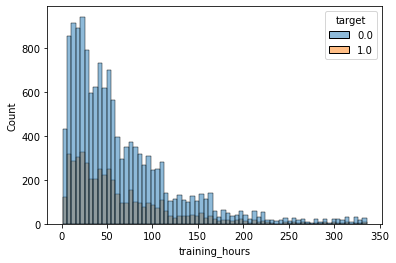

In [7]:
sns.histplot(data = job,
            x = 'training_hours',
            hue = 'target')
plt.show()

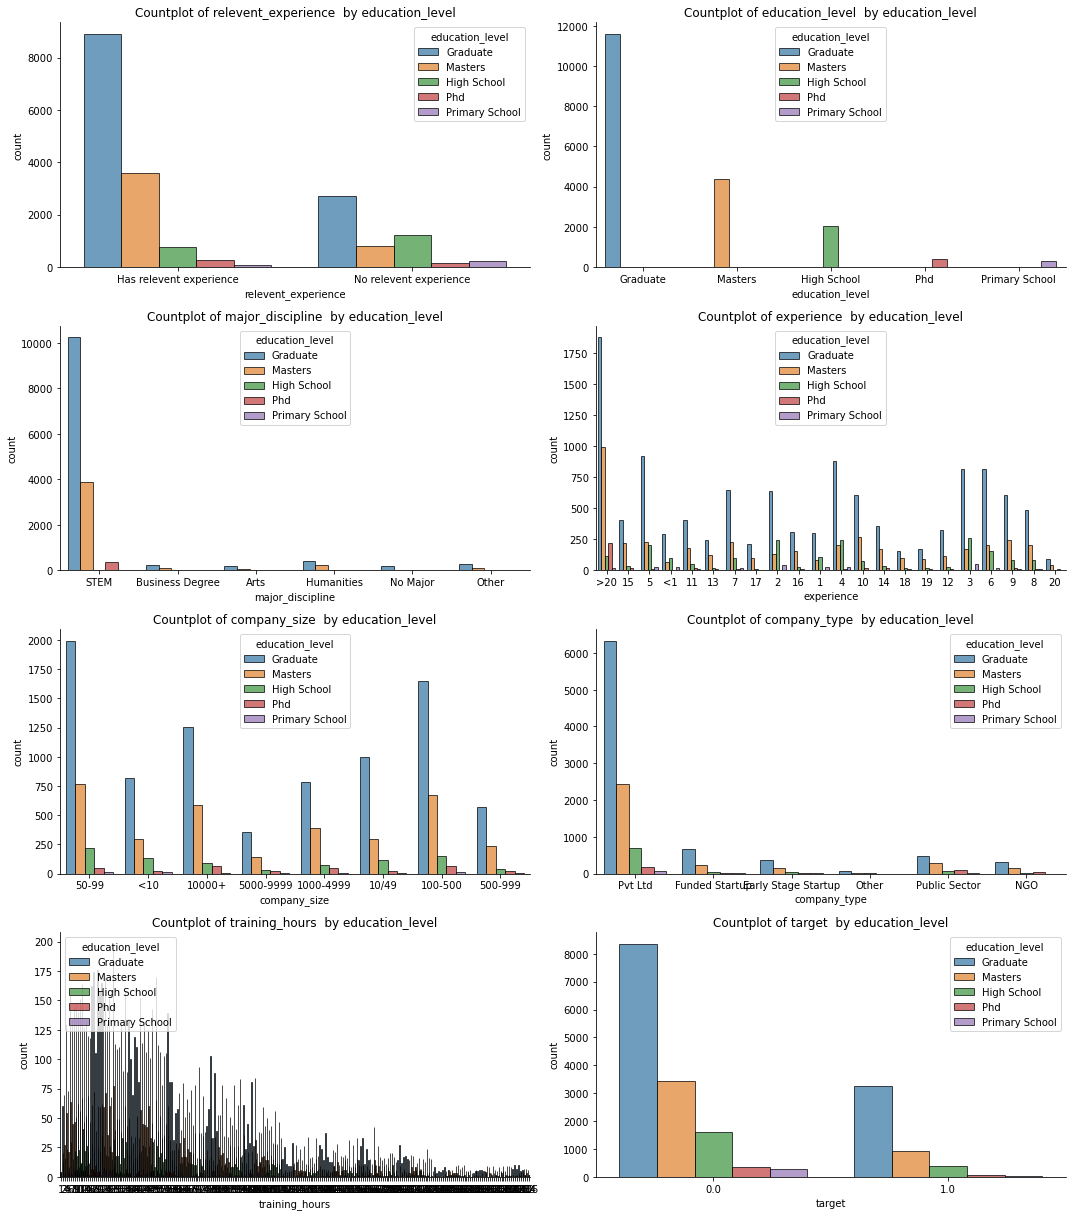

In [8]:
plt.figure(figsize=[15,17])
plot=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type", "training_hours","target"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=job)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [9]:
job.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
ser = job.groupby(['city', 'city_development_index']).gender.apply(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else x.fillna(x.mode()))
job['gender'] = ser

In [12]:
job.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       1
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [13]:
ser1 = job.groupby(['experience', 'city_development_index', 'relevent_experience']).enrolled_university.apply(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else x.fillna(x.mode()))
ser1

job['enrolled_university'] = ser1

In [14]:
job.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       1
relevent_experience          0
enrolled_university         84
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [15]:
ser2 = job.groupby(['enrolled_university', 'city_development_index']).education_level.apply(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else x.fillna(x.mode()))
ser2

job['education_level'] = ser2

In [16]:
job.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       1
relevent_experience          0
enrolled_university         84
education_level             87
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [17]:
ser3 = job.groupby(['enrolled_university', 'education_level']).major_discipline.apply(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else x.fillna(x.mode()))
job['major_discipline'] = ser3

In [18]:
job.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       1
relevent_experience          0
enrolled_university         84
education_level             87
major_discipline          2409
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [20]:
ser4 = job.groupby(['experience', 'relevent_experience']).major_discipline.apply(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else x.fillna(x.mode()))
job['major_discipline'] = ser4

In [21]:
job.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       1
relevent_experience          0
enrolled_university         84
education_level             87
major_discipline            65
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [22]:
ser5 = job.groupby(['experience', 'relevent_experience', 'enrolled_university']).company_size.apply(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else x.fillna(x.mode()))
job['company_size'] = ser5

In [23]:
job.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       1
relevent_experience          0
enrolled_university         84
education_level             87
major_discipline            65
experience                  65
company_size                85
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [24]:
ser6 = job.groupby(['experience', 'company_size', 'major_discipline']).company_type.apply(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else x.fillna(x.mode()))
job['company_type'] = ser6

In [25]:
job.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      1
relevent_experience         0
enrolled_university        84
education_level            87
major_discipline           65
experience                 65
company_size               85
company_type              186
last_new_job              423
training_hours              0
target                      0
dtype: int64

In [26]:
ser7 = job.groupby(['experience', 'city_development_index', 'major_discipline']).company_type.apply(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else x.fillna(x.mode()))
job['company_type'] = ser7

In [27]:
job.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      1
relevent_experience         0
enrolled_university        84
education_level            87
major_discipline           65
experience                 65
company_size               85
company_type              129
last_new_job              423
training_hours              0
target                      0
dtype: int64

In [28]:
ser8 = job.groupby(['experience', 'relevent_experience', 'education_level']).last_new_job.apply(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else x.fillna(x.mode()))
job['last_new_job'] = ser8

In [29]:
job.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      1
relevent_experience         0
enrolled_university        84
education_level            87
major_discipline           65
experience                 65
company_size               85
company_type              129
last_new_job               90
training_hours              0
target                      0
dtype: int64

In [30]:
ser9 = job.groupby(['city', 'city_development_index']).last_new_job.apply(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else x.fillna(x.mode()))
job['last_new_job'] = ser9

In [31]:
job.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      1
relevent_experience         0
enrolled_university        84
education_level            87
major_discipline           65
experience                 65
company_size               85
company_type              129
last_new_job                0
training_hours              0
target                      0
dtype: int64

In [32]:
job.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,10/49,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [34]:
job2 = job.dropna()

In [37]:
job3 = pd.get_dummies(job2)
job3

,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,36,1.0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,29725,0.776,47,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,11561,0.624,83,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,33241,0.789,52,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,666,0.767,8,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,42,1.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
19154,31398,0.920,52,1.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
19155,24576,0.920,44,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
19156,5756,0.802,97,0.0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(job3.drop('target', axis=1), job3['target'], test_size=0.2, random_state=42)

In [43]:
logistic_model = LogisticRegression()

In [44]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred = logistic_model.predict(X_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.95      0.85      2826
         1.0       0.59      0.22      0.32       978

    accuracy                           0.76      3804
   macro avg       0.68      0.58      0.59      3804
weighted avg       0.73      0.76      0.72      3804



In [48]:
accuracy_score(y_test, y_pred)

0.7599894847528917